Contents of /content/drive/MyDrive/projects/data/raw/chest_xray/train:

/content/drive/MyDrive/projects/data/raw/chest_xray/train:
  Directory: NORMAL
  Directory: PNEUMONIA

/content/drive/MyDrive/projects/data/raw/chest_xray/train/NORMAL:

/content/drive/MyDrive/projects/data/raw/chest_xray/train/PNEUMONIA:
Contents of /content/drive/MyDrive/projects/data/raw/chest_xray/test:

/content/drive/MyDrive/projects/data/raw/chest_xray/test:
  Directory: NORMAL
  Directory: PNEUMONIA

/content/drive/MyDrive/projects/data/raw/chest_xray/test/NORMAL:

/content/drive/MyDrive/projects/data/raw/chest_xray/test/PNEUMONIA:
Contents of /content/drive/MyDrive/projects/data/raw/chest_xray/val:

/content/drive/MyDrive/projects/data/raw/chest_xray/val:
  Directory: NORMAL
  Directory: PNEUMONIA

/content/drive/MyDrive/projects/data/raw/chest_xray/val/NORMAL:

/content/drive/MyDrive/projects/data/raw/chest_xray/val/PNEUMONIA:


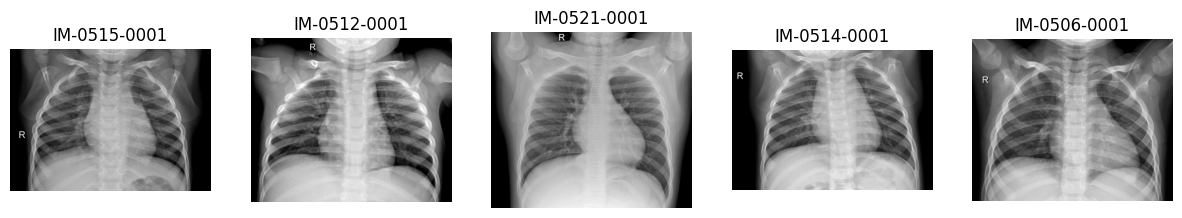

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

os.environ["DATA_PATH"] = "/content/drive/MyDrive/projects/data/raw" # set data path. Here it is my google drive you have to set your own path



# Define paths
data_dir= os.environ["DATA_PATH"] # get data directory path

train_dir = os.path.join(data_dir, 'chest_xray', 'train') # path to training data
test_dir = os.path.join(data_dir, 'chest_xray', 'test') # path to test data
val_dir = os.path.join(data_dir, 'chest_xray', 'val') # path to validation data

# Function to check image loading
def check_image_loading(img_path): # function to check if image is loaded
    img = cv2.imread(img_path) # read image
    if img is None: # check if image is loaded
        print(f"Warning: Unable to load image at {img_path}") # print warning if image is not loaded
        return False # return False if image is not loaded
    return True # return True if image is loaded

# Explore the directory structure
def explore_directory(directory): # function to explore directory
    print(f"Contents of {directory}:") # print directory name
    for root, dirs, files in os.walk(directory): # iterate over directory
        print(f"\n{root}:") # print root directory
        for name in dirs: # iterate over directories
            print(f"  Directory: {name}") # print directory name
        for name in files: # iterate over files
            img_path = os.path.join(root, name) # get image path
            if not check_image_loading(img_path): # check if image is loaded
                print(f"  File: {name} is not loaded properly") # print warning if image is not loaded

explore_directory(train_dir) # explore training directory
explore_directory(test_dir) # explore test directory
explore_directory(val_dir) # explore validation directory

# Visualize sample images with error handling
def visualize_samples(directory, n_samples=5): # function to visualize samples
    plt.figure(figsize=(15, 10)) # set figure size
    sample_count = 0 # initialize sample count
    for label in os.listdir(directory): # iterate over labels
        label_dir = os.path.join(directory, label) # get label directory
        for filename in os.listdir(label_dir): # iterate over files
            img_path = os.path.join(label_dir, filename) # get image path
            if check_image_loading(img_path): # check if image is loaded
                img = cv2.imread(img_path) # read image
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert image to RGB
                plt.subplot(1, n_samples, sample_count + 1) # create subplot
                plt.imshow(img) # show image
                plt.title(filename.split('.')[0]) # set title
                plt.axis('off') # turn off axis
                sample_count += 1 # increment sample count
            if sample_count >= n_samples: # break if enough samples are shown
                break
        if sample_count >= n_samples: # break if enough samples are shown
            break
    plt.show() # show plot

# Visualize samples from the training set
visualize_samples(train_dir, n_samples=5) # visualize samples from training directory



In [ ]:
def preprocess_image(image_path, target_size=(150, 150)): # function to preprocess image
    img = cv2.imread(image_path) # read image
    if img is None: # check if image is loaded
        print(f"Error: Unable to load image at {image_path}") # print error message if image is not loaded
        return None # return None if image is not loaded
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert image to RGB
    img = cv2.resize(img, target_size) # resize image
    img = img / 255.0 # normalize image
    return img # return preprocessed image

def load_and_preprocess_images(directory, target_size=(150, 150)): # function to load and preprocess images
    images = [] # initialize list to store images
    labels = [] # initialize list to store labels
    for label in os.listdir(directory): # iterate over labels
        label_dir = os.path.join(directory, label) # get label directory
        for img_name in os.listdir(label_dir): # iterate over images
            img_path = os.path.join(label_dir, img_name) # get image path
            img = preprocess_image(img_path, target_size) # preprocess image
            if img is not None: # check if image is loaded
                images.append(img) # append image to list
                labels.append(label) # append label to list
            else: # if image is not loaded
                print(f"Skipping image {img_path} due to loading error") # print error message
    return np.array(images), np.array(labels) # return images and labels as numpy arrays

# Load and preprocess images
train_images, train_labels = load_and_preprocess_images(train_dir) # load and preprocess training images
test_images, test_labels = load_and_preprocess_images(test_dir) # load and preprocess test images
val_images, val_labels = load_and_preprocess_images(val_dir) # load and preprocess validation images

# Display shapes
print(f"Training set: {train_images.shape}, Labels: {len(train_labels)}") # print training set shape and number of labels
print(f"Testing set: {test_images.shape}, Labels: {len(test_labels)}") # print test set shape and number of labels
print(f"Validation set: {val_images.shape}, Labels: {len(val_labels)}") # print validation set shape and number of labels


Training set: (5216, 150, 150, 3), Labels: 5216
Testing set: (624, 150, 150, 3), Labels: 624
Validation set: (16, 150, 150, 3), Labels: 16
